# Integrated Project

© Explore Data Science Academy

---
### Honour Code

I {**Bruce, Kgarimetsa**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Insurance industry in Africa

Africa is home to 17% of the world's population.

In 2017 it was estimated that the total value
of insurance premiums was 45 billion U.S
dollars.

The insurance industry in Africa only
represents >1% of insured catastrophe
losses worldwide.

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set.
 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Feature Engineering</a>


In [1]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


<a id="two"></a>
## 2. Loading the Data


---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `Cleaned Insurance Claims` file into a DataFrame. |

---

In [8]:
df_claims = pd.read_excel(r'CLEANED_insurance_claims_raw.xlsx')

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [10]:
df_claims.head()


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610.0,6510.0,13020.0,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,Not specified,5070.0,780.0,780.0,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650.0,7700.0,3850.0,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400.0,6340.0,6340.0,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500.0,1300.0,650.0,4550,Accura,RSX,2009,N


In [13]:
df_claims.shape


(996, 39)

In [12]:
df_claims.describe()


,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,996.000000,996.000000,996.000000,996.000000,993.000000,9.960000e+02,996.000000,994.000000,996.000000,996.000000,996.000000,996.000000,996.000000,992.000000,995.000000,995.000000,996.000000,996.000000
mean,203.881526,38.964859,546988.514056,1134.036145,1256.334773,1.091365e+06,501255.838353,25214.989940,-26901.305221,11.630522,1.838353,0.993976,1.490964,52755.655242,7442.643216,7390.592965,37917.500000,2005.118474
std,115.189065,9.138343,256892.240217,610.919214,244.366887,2.291054e+06,71720.920979,27874.126988,28109.035159,6.957302,1.018904,0.819341,1.111348,26382.426339,4887.904480,4820.183833,18867.127859,6.016729
min,0.000000,19.000000,100804.000000,500.000000,433.330000,0.000000e+00,430104.000000,0.000000,-111100.000000,0.000000,1.000000,0.000000,0.000000,100.000000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,336472.250000,500.000000,1090.030000,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.000000,0.000000,1.000000,41812.500000,4290.000000,4440.000000,30292.500000,2000.000000
50%,199.000000,38.000000,533940.500000,1000.000000,1257.040000,0.000000e+00,466445.500000,0.000000,-24300.000000,12.000000,1.000000,1.000000,1.000000,57900.000000,6780.000000,6750.000000,42080.000000,2005.000000
75%,276.000000,44.250000,760309.250000,2000.000000,1415.680000,0.000000e+00,603262.250000,51075.000000,0.000000,17.000000,3.000000,2.000000,2.000000,70620.000000,11340.000000,10870.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.000000,2.000000,3.000000,114920.000000,21450.000000,23670.000000,79560.000000,2015.000000


In [11]:
df_claims.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           996 non-null    int64         
 1   age                          996 non-null    int64         
 2   policy_number                996 non-null    int64         
 3   policy_bind_date             996 non-null    datetime64[ns]
 4   policy_state                 996 non-null    object        
 5   policy_csl                   996 non-null    object        
 6   policy_deductable            996 non-null    int64         
 7   policy_annual_premium        993 non-null    float64       
 8   umbrella_limit               996 non-null    int64         
 9   insured_zip                  996 non-null    int64         
 10  insured_sex                  996 non-null    object        
 11  insured_education_level      995 non-null    

In [14]:
df_claims.corr()


C:\Users\f5172993\AppData\Local\Temp\ipykernel_24176\2003170560.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_claims.corr()


,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
months_as_customer,1.000000,0.921303,0.057041,0.027761,0.007526,0.016348,0.018143,0.003936,0.019671,0.071894,0.016124,-0.010294,0.058480,0.062308,0.065277,0.035579,0.060818,-0.000779
age,0.921303,1.000000,0.057882,0.029018,0.019981,0.018923,0.024353,-0.009826,0.005473,0.089868,0.025187,-0.016404,0.049696,0.069827,0.074992,0.061397,0.062972,0.001776
policy_number,0.057041,0.057882,1.000000,-0.002832,0.023734,0.013813,0.004689,0.012058,-0.002898,0.003408,0.017431,-0.009075,-0.016918,-0.017712,-0.008447,-0.008629,-0.018273,-0.001968
policy_deductable,0.027761,0.029018,-0.002832,1.000000,-0.002859,0.002731,0.003218,0.036292,-0.026751,0.058955,0.048566,-0.022479,0.070989,0.024450,0.042579,0.068105,0.008439,0.026162
policy_annual_premium,0.007526,0.019981,0.023734,-0.002859,1.000000,-0.011241,0.033768,-0.015458,0.019681,-0.000432,-0.045875,0.027813,0.004683,0.009369,-0.012775,-0.011019,0.021632,-0.048109
umbrella_limit,0.016348,0.018923,0.013813,0.002731,-0.011241,1.000000,0.018471,-0.048541,-0.028244,-0.026190,-0.024665,0.023851,-0.001846,-0.037473,-0.042540,-0.021429,-0.035661,0.010369
insured_zip,0.018143,0.024353,0.004689,0.003218,0.033768,0.018471,1.000000,0.008014,0.050101,0.009803,0.029278,0.024645,0.018615,-0.032536,-0.015830,-0.002832,-0.036890,-0.034540
capital-gains,0.003936,-0.009826,0.012058,0.036292,-0.015458,-0.048541,0.008014,1.000000,-0.045845,-0.016304,0.060303,0.056719,-0.015509,0.015725,0.026407,0.003257,0.016723,0.029003
capital-loss,0.019671,0.005473,-0.002898,-0.026751,0.019681,-0.028244,0.050101,-0.045845,1.000000,-0.026984,-0.015560,-0.022225,-0.038071,-0.038637,-0.044986,-0.024781,-0.033405,-0.054361
incident_hour_of_the_day,0.071894,0.089868,0.003408,0.058955,-0.000432,-0.026190,0.009803,-0.016304,-0.026984,1.000000,0.118881,-0.031774,0.009186,0.219755,0.166935,0.178373,0.215084,0.023231


In [116]:
# plot relevant feature interactions

In [241]:
#  Creating scatterplot matrices of each predictor variable againts other variable and the target variable which is the shortfall.
#  Aim is to see any relationship between the predictors and the target

In [120]:
# evaluate correlation

In [247]:
#  Find correlation between all the predictor variables against the target variable. seemed as though Barcelona temp had te highest correlation to the load shoatfall by having the correlation value closest to 1.

C:\Users\f5172993\AppData\Local\Temp\ipykernel_24176\2462057537.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_claims.corr()


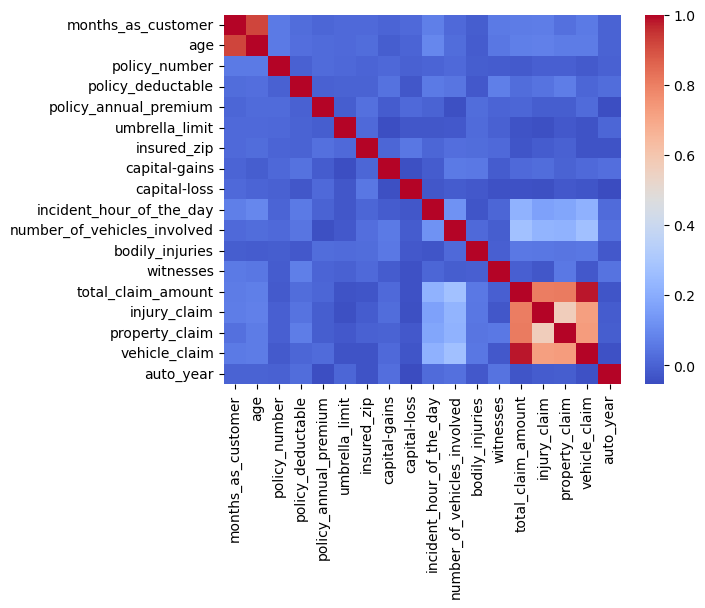

In [15]:
corr_matrix = df_claims.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.show()

In [ ]:
# have a look at feature distributions

<a id="four"></a>
## 4. Feature Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [ ]:
# remove missing values/ features

In [17]:
df_claims.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610.0,6510.0,13020.0,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,Not specified,5070.0,780.0,780.0,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650.0,7700.0,3850.0,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400.0,6340.0,6340.0,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500.0,1300.0,650.0,4550,Accura,RSX,2009,N


In [22]:
df_claims['years_as_customer'] = (df_claims['months_as_customer']/12).round()
df_claims.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,years_as_customer
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610.0,6510.0,13020.0,52080,Saab,92x,2004,Y,27.0
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,Not specified,5070.0,780.0,780.0,3510,Mercedes,E400,2007,Y,19.0
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650.0,7700.0,3850.0,23100,Dodge,RAM,2007,N,11.0
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400.0,6340.0,6340.0,50720,Chevrolet,Tahoe,2014,Y,21.0
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500.0,1300.0,650.0,4550,Accura,RSX,2009,N,19.0


In [23]:
df_claims['total_claims'] = df_claims['injury_claim']+df_claims['property_claim']+df_claims['vehicle_claim']
df_claims.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,years_as_customer,total_claims
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,71610.0,6510.0,13020.0,52080,Saab,92x,2004,Y,27.0,71610.0
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,5070.0,780.0,780.0,3510,Mercedes,E400,2007,Y,19.0,5070.0
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,34650.0,7700.0,3850.0,23100,Dodge,RAM,2007,N,11.0,34650.0
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,63400.0,6340.0,6340.0,50720,Chevrolet,Tahoe,2014,Y,21.0,63400.0
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,6500.0,1300.0,650.0,4550,Accura,RSX,2009,N,19.0,6500.0


In [16]:
df_claims.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          3
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        1
insured_occupation             0
insured_hobbies                2
insured_relationship           0
capital-gains                  2
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          2
incident_state                 2
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [24]:
df_claims.dropna()
df_claims.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          3
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        1
insured_occupation             0
insured_hobbies                2
insured_relationship           0
capital-gains                  2
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          2
incident_state                 2
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [ ]:
# create new features

In [27]:
df_claims.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,years_as_customer,total_claims
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,71610.0,6510.0,13020.0,52080,Saab,92x,2004,Y,27.0,71610.0
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,5070.0,780.0,780.0,3510,Mercedes,E400,2007,Y,19.0,5070.0
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,34650.0,7700.0,3850.0,23100,Dodge,RAM,2007,N,11.0,34650.0
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,63400.0,6340.0,6340.0,50720,Chevrolet,Tahoe,2014,Y,21.0,63400.0
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,6500.0,1300.0,650.0,4550,Accura,RSX,2009,N,19.0,6500.0


In [28]:
df_claims.to_csv('FEATURED_ENGINEERED_Insurance Claims.csv', index=False)

In [253]:
#  creat new features by extracting month, day and hour from the time column with all these information

In [256]:
# engineer existing features

In [259]:
#  Before proceeding with the next step of creating model, we need to make sure the data is in its best form in order to output accurate results
#  Therefore in the data cleaing phase, i've decided to remove variables that I think will cause discrepancies, such as variables with a lot of missing values, variables in wrong datatypes (non-numeric)